<a href="https://colab.research.google.com/github/Erundule/breast_cancer_svm_model/blob/main/C%C3%B3pia_de_Exercicio_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício SVM

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [39]:
#carregando o dataset
cancer = load_breast_cancer()

In [40]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
#Separação do x e y (variáveis dependentes(target) e variáveis independentes)
X = cancer.data
y = cancer.target

In [42]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

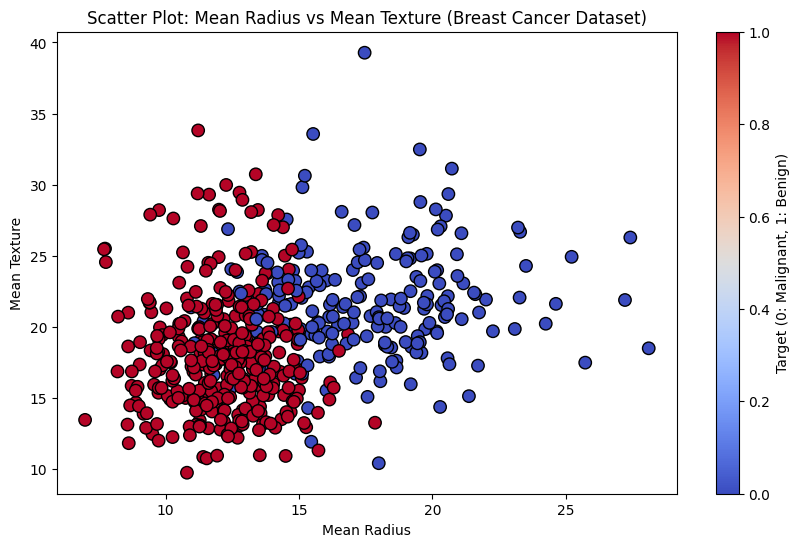

In [44]:
#tentando entender se os dados são lineares
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Vamos criar um scatter plot com duas das features para visualização
X_scatter = df[['mean radius', 'mean texture']]
y_scatter = cancer.target

# Criando o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scatter['mean radius'], X_scatter['mean texture'], c=y, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Scatter Plot: Mean Radius vs Mean Texture (Breast Cancer Dataset)')
plt.colorbar(label='Target (0: Malignant, 1: Benign)')
plt.show()

In [45]:
#dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [46]:
#padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [47]:
#Criar o modelo
model = SVC(kernel= 'rbf', C=1.0, gamma= 0.1)

In [48]:
#treinar o modelo
model.fit(X_train, y_train)

SVC(gamma=0.1)

In [49]:
#testar o modelo
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [50]:
# imprimir as métricas

print(f'Relatório: {classification_report(y_test, y_pred)}')
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

Relatório:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Acurácia: 0.9649122807017544


#Implementação do Grid Search

In [51]:
# Definir o grid de parâmetros para busca
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Inicializar o SVM
svm = SVC()

# Inicializar o GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor configuração de parâmetros
print(f"Melhor kernel: {grid_search.best_params_['kernel']}")
print(f"Melhor C: {grid_search.best_params_['C']}")
print(f"Melhor gamma: {grid_search.best_params_['gamma']}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhor kernel: linear
Melhor C: 0.1
Melhor gamma: 0.1


In [52]:
# Treinar o modelo com os melhores parâmetros
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Predições
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

# Scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)


print(f'Relatório: {classification_report(y_test, y_test_pred)}')
print(f"Score no treino: {train_score:.2f}")
print(f"Score no teste: {test_score:.2f}")

Relatório:               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Score no treino: 0.98
Score no teste: 0.98


##Implementação da curva de aprendizado

In [53]:
# Gerar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

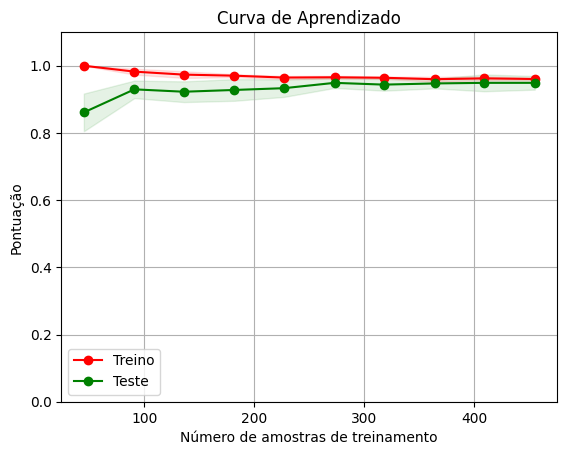

In [54]:
# Calcular médias e desvios padrão
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Número de amostras de treinamento")
plt.ylabel("Pontuação")
plt.ylim(0, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()

##Implementação da fronteira de decisão

In [55]:
# #Fronteira
# def plot_decision_boundary(X, y, model):
#     h = .02  # Passo da malha
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, alpha=0.8)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.title('SVM - Fronteira de Decisão')
#     plt.show()

# plot_decision_boundary(X_train, y_train, best_svm)
# plot_decision_boundary(X_train, y_train, model)

### Fronteira de decisão do primeiro modelo

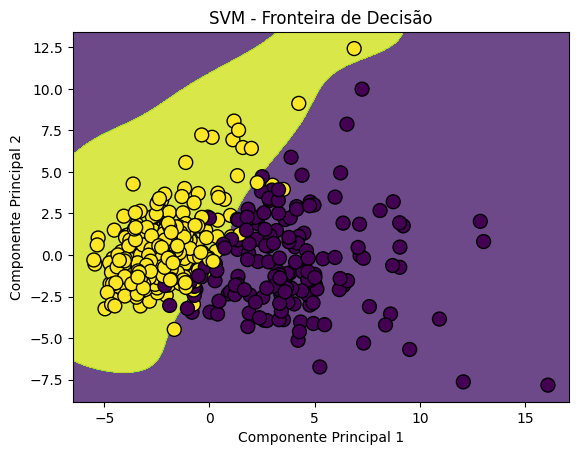

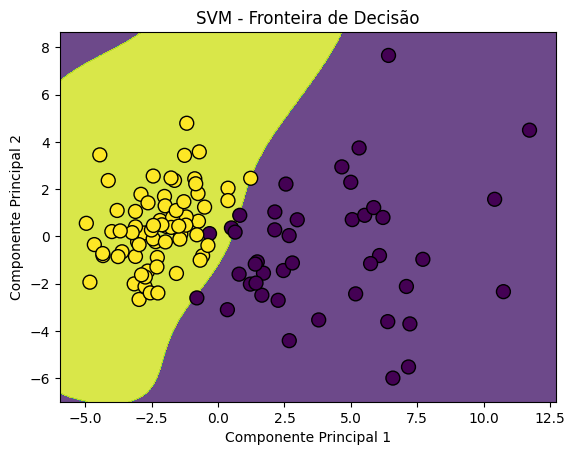

In [56]:
from sklearn.decomposition import PCA

# Reduzir as dimensões para 2 componentes principais usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o modelo com os dados reduzidos
model_pca = SVC(kernel='rbf', C=1, gamma=0.1)
model_pca.fit(X_train_pca, y_train)

# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    h = .02  # Passo da malha
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('SVM - Fronteira de Decisão')
    plt.show()

# Plotar a fronteira de decisão para os dados de treino
plot_decision_boundary(X_train_pca, y_train, model_pca)

# Plotar a fronteira de decisão para os dados de teste
plot_decision_boundary(X_test_pca, y_test, model_pca)


### Fronteira de decisão do grid search

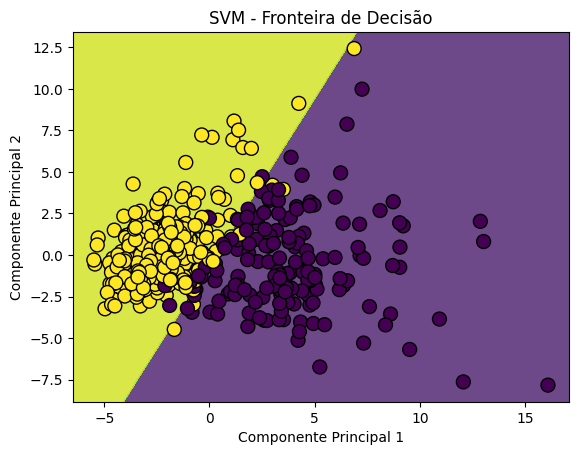

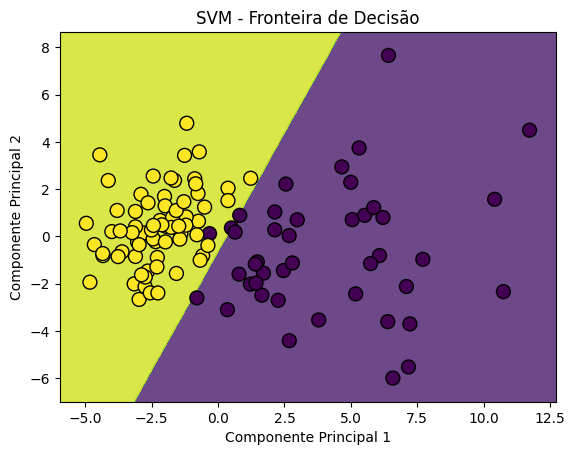

In [57]:
from sklearn.decomposition import PCA

# Reduzir as dimensões para 2 componentes principais usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o modelo com dados reduzidos
best_svm_pca = grid_search.best_estimator_
best_svm_pca.fit(X_train_pca, y_train)


# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    h = .02  # Passo da malha
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('SVM - Fronteira de Decisão')
    plt.show()

# Plotar a fronteira de decisão para os dados de treino
plot_decision_boundary(X_train_pca, y_train, best_svm_pca)

# Plotar a fronteira de decisão para os dados de teste
plot_decision_boundary(X_test_pca, y_test, best_svm_pca)
